# Estadística Aplicada
## Tercer Parcial

Nombre: Cecilia Sarahí Gutiérrez Padilla  
Matrícula: 1953437  
Grupo: 043

In [1]:
## Librerías básicas
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
## Statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
## Pmdarima
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


Has sido contratado como asesor del director de Metrorrey, la empresa encargada de administrar el metro en el área metropolitana de Monterrey, NL.

El director te ha proporcionado la siguiente base de datos con la información mensual del número de pasajeros y el ingreso generado por pasajes:

In [3]:
metrorrey=pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv")

1. Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada.

In [4]:
metrorrey

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.000,3240.000
1,1995/02,2879.000,3623.000
2,1995/03,3103.000,3990.000
3,1995/04,3491.000,3321.000
4,1995/05,3109.000,3777.000
...,...,...,...
339,2023/04,9523.669,38799.657
340,2023/05,11891.646,58511.798
341,2023/06,10657.712,55684.063
342,2023/07,10894.497,56378.304


In [5]:
## ¿Qué tipo son las variables?
metrorrey.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [6]:
## Missing values
metrorrey.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [7]:
## Tenemos que la variable fecha sería en este caso mes
metrorrey["mes"]= pd.to_datetime(metrorrey["mes"], format = "%Y/%m")
metrorrey= metrorrey.set_index("mes")
metrorrey= metrorrey.asfreq("MS")

In [8]:
metrorrey.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

In [9]:
metrorrey.tail()

,miles de pasajeros,ingresos (miles de pesos)
mes,,
2023-04-01,9523.669,38799.657
2023-05-01,11891.646,58511.798
2023-06-01,10657.712,55684.063
2023-07-01,10894.497,56378.304
2023-08-01,12201.982,57821.901


2. Análisis  exploratorio.  Utilizando  código  de  Python  genera  un  print() para  cada una de la siguiente información:

a) Rango de fechas

In [10]:
obs= metrorrey.count()[0]
ultfecha= metrorrey.index[obs-1]
print('El rango de fechas va de', metrorrey.index[0], 'hasta el', ultfecha)

El rango de fechas va de 1995-01-01 00:00:00 hasta el 2023-08-01 00:00:00


C:\Users\Cecilia\AppData\Local\Temp\ipykernel_8780\2279889606.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs= metrorrey.count()[0]


b) Número de observaciones

In [11]:
print("El número de observaciones es de:", metrorrey["miles de pasajeros"].count())

El número de observaciones es de: 344


c) Valor mínimo y valor máximo del número de pasajeros

In [12]:
minpasajeros= metrorrey['miles de pasajeros'].min().round(2)
maxpasajeros= metrorrey['miles de pasajeros'].max().round(2)
print('El número mínimo de pasajeros es de:', minpasajeros, 'miles\nEl número máximo de pasajeros es de:', maxpasajeros, 'miles')

El número mínimo de pasajeros es de: 2397.0 miles
El número máximo de pasajeros es de: 17534.52 miles


3. Grafica lo siguiente

a) La serie de miles de pasajeros

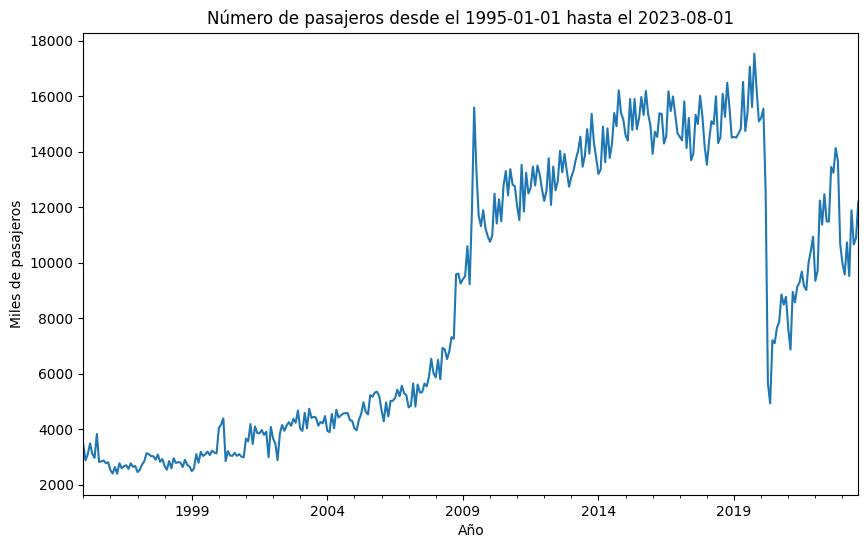

In [13]:
metrorrey["miles de pasajeros"].plot(figsize=(10,6))
plt.title("Número de pasajeros desde el 1995-01-01 hasta el 2023-08-01")
plt.xlabel("Año")
plt.ylabel("Miles de pasajeros")
plt.show()

b) Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

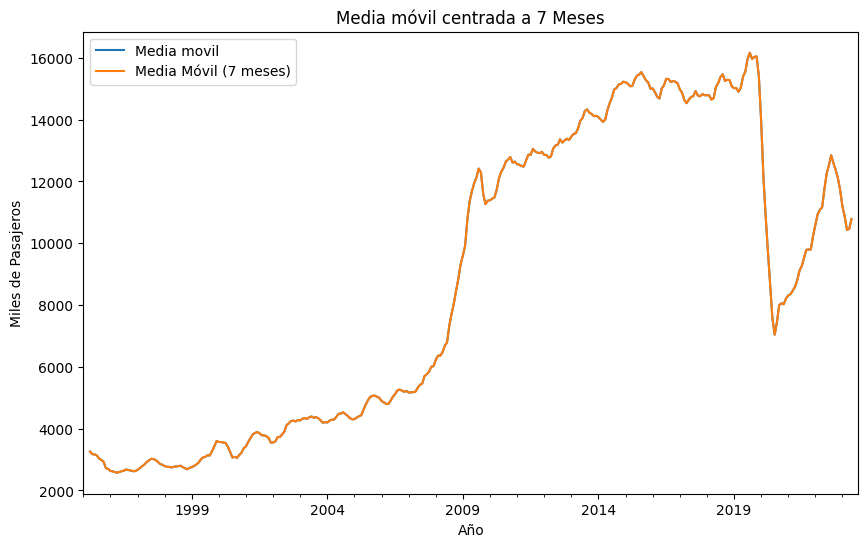

In [14]:
metrorrey['Media movil'] = metrorrey['miles de pasajeros'].rolling(7, center=True).mean()
metrorrey['Media movil'].plot(figsize=(10, 6))
metrorrey['Media movil'].plot(label='Media Móvil (7 meses)')
plt.title('Media móvil centrada a 7 Meses')
plt.xlabel('Año')
plt.ylabel('Miles de Pasajeros')
plt.legend()
plt.show()

En la gráfica se aprecia una tendencia alcista, se podría decir que tiene que ver con el aumento de la población que hay en Monterrey, además de que sabemos que ha aumentado el precio del pasaje pero aún así hay gente que le es indispensable usarlo por lo que significa que este es rentable. En cuanto a las subidas y caídas; se puede observar que del 2007 al 2010 aumentó su uso ya que en el 2007 tuvo ampliación de General Anaya a Universidad y en el 2008 de Universidad a Sendero, mientras que se puede observar que hubo caídas en el uso del metro donde el del 2019 se puede decir que tuvo que ver con la pandemia del COVID-19 y el otro en el 2022 se debió principalmente a la clausura temporal de algunas estaciones de la línea 2 para llevar a cabo trabajos de reparación.

4. El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento.

In [15]:
ETS= seasonal_decompose(metrorrey['miles de pasajeros'], model= 'mult')
ETS.seasonal.tail(24)


mes
2021-09-01    0.995570
2021-10-01    1.062610
2021-11-01    1.014896
2021-12-01    0.997875
2022-01-01    0.954408
2022-02-01    0.950919
2022-03-01    1.031340
2022-04-01    0.938619
2022-05-01    1.028585
2022-06-01    0.986927
2022-07-01    1.003497
2022-08-01    1.034753
2022-09-01    0.995570
2022-10-01    1.062610
2022-11-01    1.014896
2022-12-01    0.997875
2023-01-01    0.954408
2023-02-01    0.950919
2023-03-01    1.031340
2023-04-01    0.938619
2023-05-01    1.028585
2023-06-01    0.986927
2023-07-01    1.003497
2023-08-01    1.034753
Freq: MS, Name: seasonal, dtype: float64

Podemos sugerir al director de Metrorrey que el mes más adecuado para dar el mantenimiento de los vagones del metro es Abril, ya que es el mes con la menor demanda, y después podría ser en Enero o Febrero que son los siguientes meses con menor demanda.

5. El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos.

In [16]:
holtwinters_model= ExponentialSmoothing(metrorrey['miles de pasajeros'], trend = 'add', seasonal = 'mul', seasonal_periods=12).fit()

c:\Users\Cecilia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [26]:
pron5m= holtwinters_model.forecast(5)
pron_ingreso= pron5m*7.1
print("El pronóstico del número de pasajeros de los siguientes 5 meses es de: \n",pron5m.round(2))

El pronóstico del número de pasajeros de los siguientes 5 meses es de: 
 2023-09-01    11441.19
2023-10-01    11998.36
2023-11-01    11200.85
2023-12-01    10433.61
2024-01-01     9967.18
Freq: MS, dtype: float64


In [28]:
print("Los ingresos por pasaje de los próximos 5 meses son de aproximadamente:  \n", pron_ingreso.round(2))

Los ingresos por pasaje de los próximos 5 meses son de aproximadamente:  
 2023-09-01    81232.42
2023-10-01    85188.39
2023-11-01    79526.05
2023-12-01    74078.64
2024-01-01    70766.98
Freq: MS, dtype: float64


6. Realiza   un   pronóstico de   los   miles   de   pasajeros con   el   modelo   ARIMA cumpliendo los siguientes pasos:

a) Realiza una prueba de raíz unitaria a la serie original

In [29]:
prueba_adf= adfuller(metrorrey['miles de pasajeros'])
pvalue= prueba_adf[1]
pvalue.round(2)

0.58

No rechazamos H0 ya que pvalue=.58 < alfa=.05, por lo que decimos con un 95% de confianza que la serie de tiempo es no estacionaria.

In [31]:
## Como no es estacionaria, entonces aplicaremos primeras diferencias
metrorrey['mdp_diff']= metrorrey['miles de pasajeros'].diff()
metrorrey.head()

,miles de pasajeros,ingresos (miles de pesos),Media movil,mdp_diff
mes,,,,
1995-01-01,3439.0,3240.0,NaN,NaN
1995-02-01,2879.0,3623.0,NaN,-560.0
1995-03-01,3103.0,3990.0,NaN,224.0
1995-04-01,3491.0,3321.0,3259.000000,388.0
1995-05-01,3109.0,3777.0,3170.857143,-382.0


In [32]:
## Prueba de raíz unitaria
prueba_adf1= adfuller(metrorrey['mdp_diff'].dropna())
pvalue1= prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos H0 ya que pvalue=0 < alfa=.05, por lo que decimos con un 95% de confianza que la serie de primeras diferencias es estacionaria.

d) Realiza  las  graficas  de  autocorrelación  de  la  serie  estacionaria  para verificar si la serie tiene o no un componente estacional.

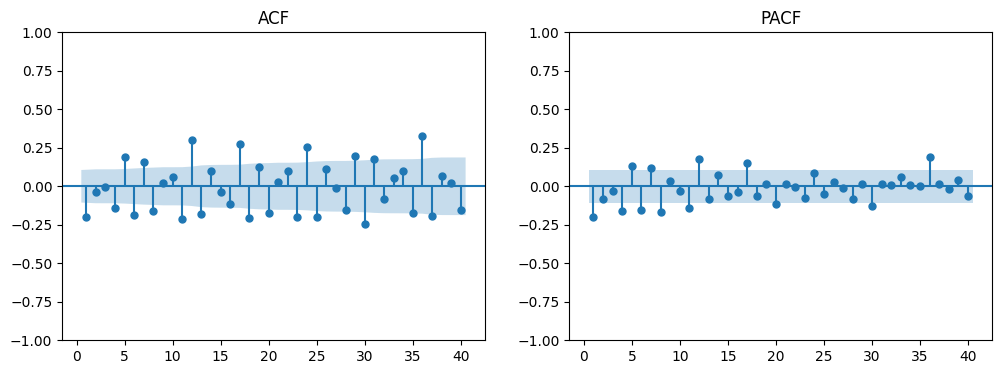

In [33]:
ig, ax = plt.subplots(1, 2, figsize = (12, 4))
plot_acf(metrorrey['mdp_diff'].dropna(), zero=False, lags = 40, ax = ax[0], title='ACF')
plot_pacf(metrorrey['mdp_diff'].dropna(), zero= False, lags = 40, ax = ax[1], title='PACF')
plt.show()

In [36]:
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p= 1, start_q= 1,
              max_p= 7, max_q= 7,
              information_criterion= 'aic',
              seasonal= True,
              m= 12, 
              start_P= 1, start_Q= 1,
              max_P= 7, max_Q= 7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [37]:
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p= 1, start_q =1,
              max_p= 7, max_q= 7,
              information_criterion= 'bic',
              seasonal= True,
              m= 12, 
              start_P= 1, start_Q= 1,
              max_P= 7, max_Q= 7)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [38]:
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p= 1, start_q= 1,
              max_p= 7, max_q= 7,
              information_criterion= 'hqic',
              seasonal= True,
              m= 12, 
              start_P= 1, start_Q= 1,
              max_P= 7, max_Q= 7)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [40]:
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p= 1, start_q= 1,
              max_p= 7, max_q= 7,
              information_criterion= 'oob',
              seasonal= True,
              m= 12, 
              start_P= 1, start_Q= 1,
              max_P= 7, max_Q= 7)

c:\Users\Cecilia\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

e) Utiliza auto_arimapara encontrar el orden del modelo arima, dando el parámetro information_criterionprueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic.

Se usará el SARIMA(2,1,0)(1,0,1)[12] y se mostrará el resultado con hqic, ya que mi matrícula es 1953437.

f) Con  el  orden  del  modelo  arima  obtenido  estima  el  modelo  arima

In [42]:
model= ARIMA(metrorrey['miles de pasajeros'],
               order= (2, 1, 0),
               seasonal_order= (1, 0, 1, 12))
results= model.fit()

In [43]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2775.293
Date:                            Tue, 07 Nov 2023   AIC                           5560.585
Time:                                    18:12:58   BIC                           5579.774
Sample:                                01-01-1995   HQIC                          5568.229
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0412      0.031     -1.343      0.179      -0.101       0.019
ar.L2         -0.1681      0.035   

g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021

c:\Users\Cecilia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['label']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


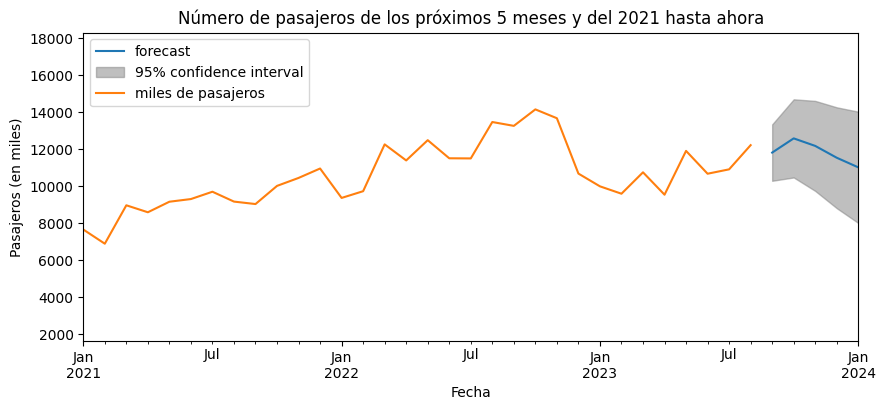

In [76]:
plot_predict(results, '2023-09-01', '2024-01-01', label = 'Pronóstico a 5 meses')
metrorrey['miles de pasajeros'].plot(figsize=(10,4))
plt.title('Número de pasajeros de los próximos 5 meses y del 2021 hasta ahora')
plt.ylabel('Pasajeros (en miles)')
plt.xlabel('Fecha')
plt.xlim('2021-01-01', '2024-01-01')
plt.legend(loc='upper left')
plt.show()

In [49]:
forecast= results.get_forecast(steps=5)
forecast_mean= forecast.predicted_mean
forecast_ci= forecast.conf_int()

In [50]:
inicio= '2023-09-01'
final= '2024-01-01'

In [61]:
pron_valor= forecast_mean[inicio:final]
pronostico_intervalos= forecast_ci.loc[inicio:final]

h) Realiza  el  pronostico  a  5  meses  con  los  intervalos  de  confianza.

In [74]:
pron5m= pd.DataFrame({'pronostico': pron_valor,
'limite inferior': pronostico_intervalos['lower miles de pasajeros'],
'limite superior': pronostico_intervalos['upper miles de pasajeros']})
pron5m

,pronostico,limite inferior,limite superior
2023-09-01,11800.348141,10275.526981,13325.169301
2023-10-01,12568.542773,10456.091734,14680.993811
2023-11-01,12161.278675,9727.675371,14594.881979
2023-12-01,11521.538612,8795.069444,14248.007779
2024-01-01,11002.535080,7994.332961,14010.737199


i) Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1

In [63]:
pron_ingresos= 7.1*pron_valor 


In [65]:
pron_ingresosint= 7.1*pronostico_intervalos


In [75]:
proningresos5m = pd.DataFrame({'pronostico': pron_ingresos,
'limite inferior': pronostico_ingresosint['lower miles de pasajeros'],
'limite superior': pronostico_ingresosint['upper miles de pasajeros']})
proningresos5m

,pronostico,limite inferior,limite superior
2023-09-01,83782.471802,72956.241566,94608.702039
2023-10-01,89236.653687,74238.251313,104235.056060
2023-11-01,86345.078594,69066.495134,103623.662053
2023-12-01,81802.924145,62444.993056,101160.855234
2024-01-01,78117.999068,56759.764022,99476.234114
